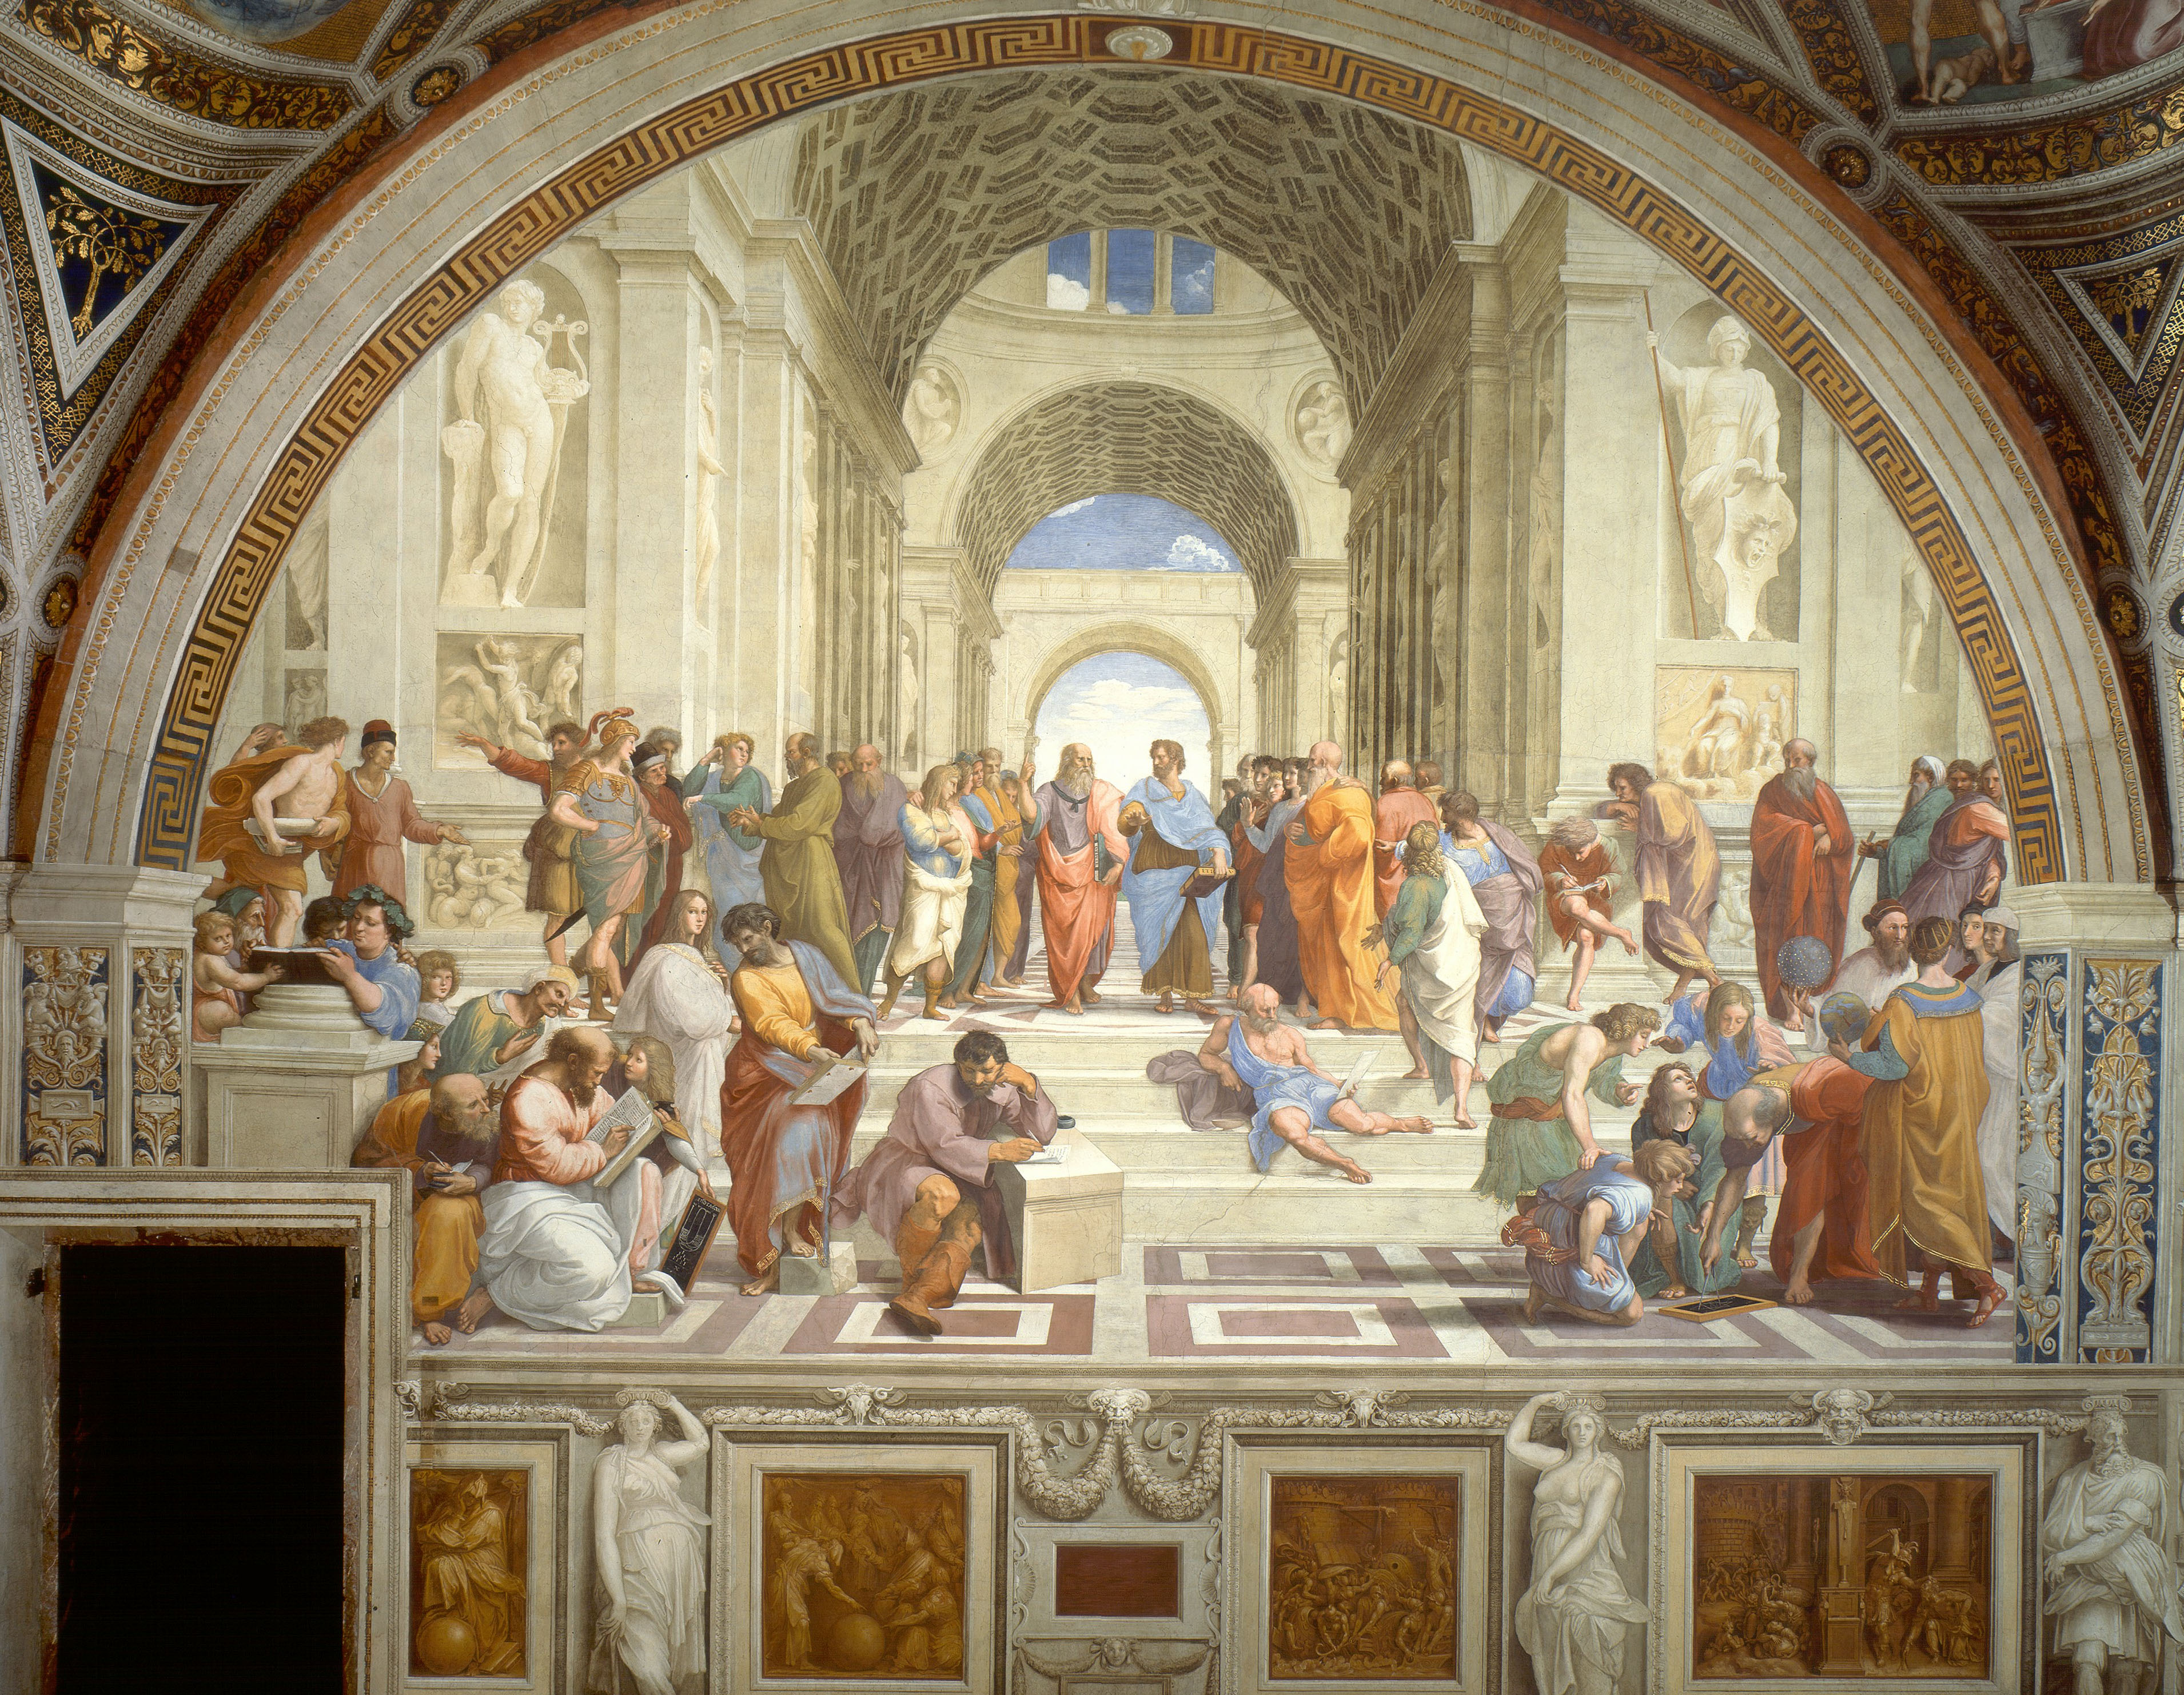

# Introduction

It's a known fact that philosophy is hard to understand, yet it's still important for us to catch a glimpse of it because once we understand a person's worldview, there is no limit to what we can do with that information - from advertising to political campaigning through to self-exploration and therapy. What's given below are some basic analysis of data regarding philosophy.

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS

# Data Overview

In [ ]:
df=pd.read_csv('philosophy_data.csv')

In [ ]:
df.info()

In [ ]:
df.head()

# Data Procession and Analysis

Numeric featuresof the data

<AxesSubplot:>

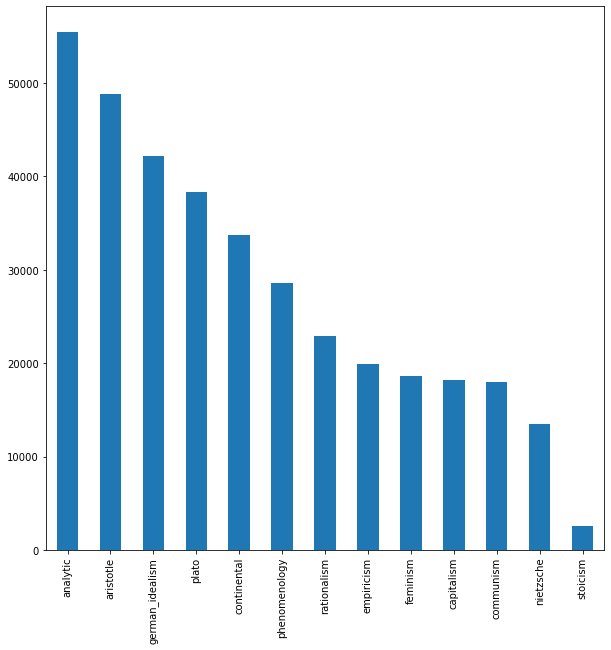

In [28]:
fig=plt.figure(figsize=(10,10))
df.school.value_counts().plot.bar()


In [ ]:
df.sentence_length.describe()
plt.figure(figsize=(16,6))
df.sentence_length.plot(kind='hist',bins=300)
plt.title('sentence length frenquency')
plt.show()

schools=df.school.unique().tolist()
plt.figure(figsize=(16,6))
sb.violinplot(x='school', y='sentence_length', data=df)
plt.title('sentence length grouped by school')
plt.grid()

authors=df.author.unique().tolist()
plt.figure(figsize=(30,6))
sb.violinplot(x='author', y='sentence_length', data=df)
plt.title('sentence length grouped by author')
plt.grid()

In [ ]:
Here we conduct a wordcloud analysis to better visualize the frequency of the word in each school

In [ ]:
stopwords=set(STOPWORDS)

In [ ]:
for sc in schools:
    df_temp=df[df.school==sc]
    print('School= ', sc.upper(), ":")

    text=''.join(txt for txt in df_temp.sentence_lowered)
    wordcloud=WordCloud(stopwords=stopwords, max_font_size=80, max_words=300, 
                   width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [17]:
columns=df.school.unique()
index=df.original_publication_date.sort_values().unique()

In [23]:
columns,index

(array(['plato', 'aristotle', 'empiricism', 'rationalism', 'analytic',
        'continental', 'phenomenology', 'german_idealism', 'communism',
        'capitalism', 'stoicism', 'nietzsche', 'feminism'], dtype=object),
 array([-350, -320,  125,  170, 1637, 1641, 1674, 1677, 1689, 1710, 1713,
        1739, 1776, 1779, 1781, 1788, 1790, 1792, 1798, 1807, 1817, 1820,
        1848, 1862, 1883, 1886, 1887, 1888, 1907, 1910, 1912, 1921, 1927,
        1936, 1945, 1949, 1950, 1953, 1959, 1961, 1963, 1966, 1967, 1968,
        1972, 1975, 1981, 1985], dtype=int64))

In [24]:
trend_matrix=pd.DataFrame(np.zeros((len(index),len(columns))),index=index,columns=columns)

In [25]:
for i in range(len(index)):
    for j in range(len(columns)):
        try:
            trend_matrix.iloc[i,j]=df[df.original_publication_date==index[i]]['school'].value_counts()[columns[j]]
        except KeyError:
            trend_matrix.iloc[i,j]=0

In [21]:
trend_matrix

,plato,aristotle,empiricism,rationalism,analytic,continental,phenomenology,german_idealism,communism,capitalism,stoicism,nietzsche,feminism
-350,38366.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-320,0.0,48779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,323.0,0.0,0.0
170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2212.0,0.0,0.0
1637,0.0,0.0,0.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1641,0.0,0.0,0.0,792.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1674,0.0,0.0,0.0,12997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,3793.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1689,0.0,0.0,8885.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1710,0.0,0.0,1040.0,5027.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

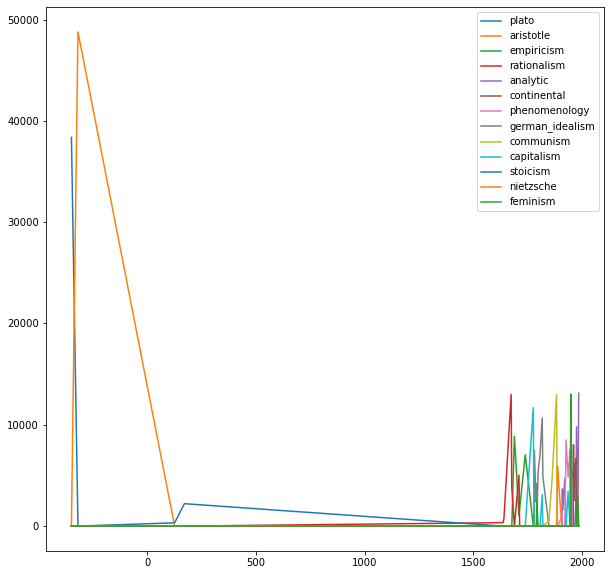

In [22]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
trend_matrix.plot(ax=ax)

# 
From the graph above, we can easily draw a conclusion that the concept of Aristotle took the mainstream right at the beginning before 
it began to waine. In 17th century, various idea flourished and this trend kept about 400 years. One fun fact is that there is no No philosophical school that can last forever.